## Bedroom results:

Loaded 5000 images for category 'real'
Loaded 5000 images for category 'gansformer'
Loaded 768 images for category 'ddpm'

Bedroom RGB Channel Moments by Category:
Category: real
  R: {'mean': 146.516276390178, 'variance': 4259.027506059806, 'skewness': -0.3425416924347921, 'kurtosis': -0.7749978455619777}
  G: {'mean': 130.69586447348198, 'variance': 4575.299823938088, 'skewness': -0.10259723798764028, 'kurtosis': -0.9593044450521204}
  B: {'mean': 116.49029703748262, 'variance': 5021.103520039183, 'skewness': 0.1338663782303579, 'kurtosis': -1.0287647009512568}
Category: gansformer
  R: {'mean': 153.26736029, 'variance': 3073.7289583053266, 'skewness': -0.568941364818394, 'kurtosis': -0.3005552204306836}
  G: {'mean': 139.420373645, 'variance': 3512.8860210035737, 'skewness': -0.35983438978426796, 'kurtosis': -0.6339807772245032}
  B: {'mean': 122.59850469, 'variance': 3967.6790558560647, 'skewness': -0.08769604582231581, 'kurtosis': -0.8424067831509356}
Category: ddpm
  R: {'mean': 

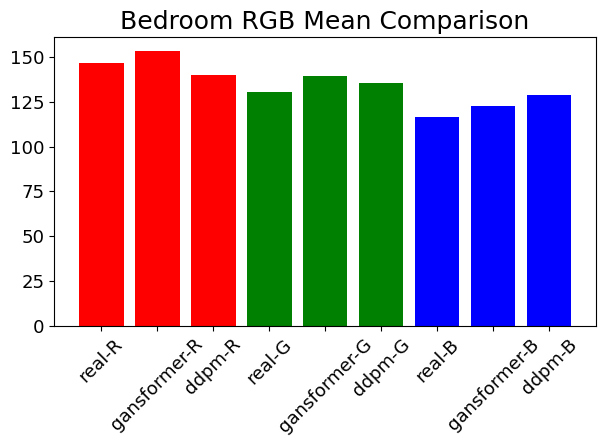

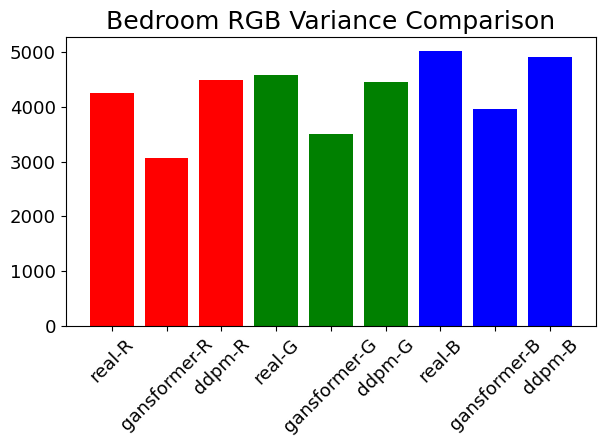

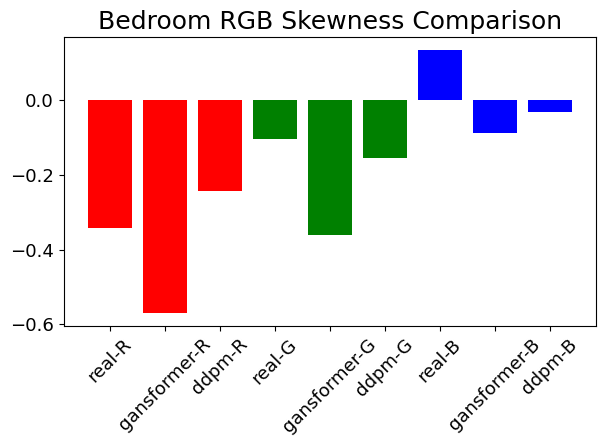

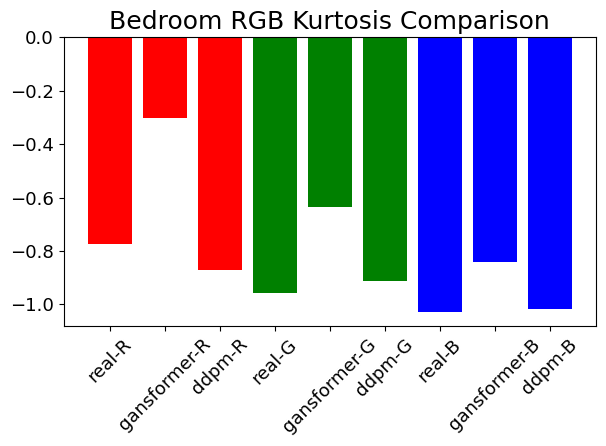

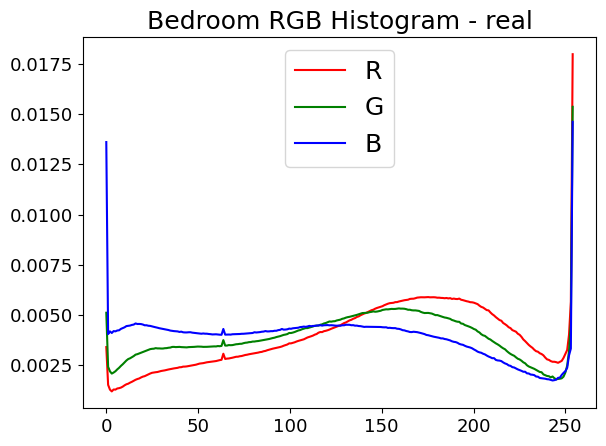

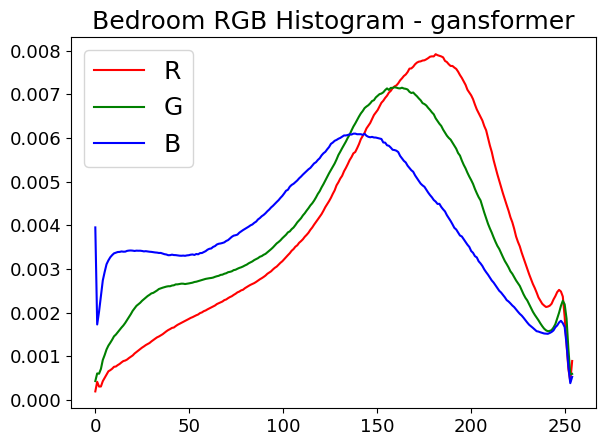

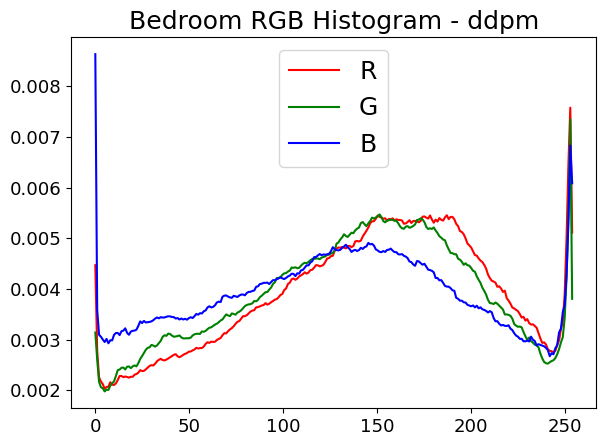


Bedroom HSV Channel Moments by Category:
Category: real
  H: {'mean': 41.904202495487915, 'variance': 2369.4200615525647, 'skewness': 1.4766355855729338, 'kurtosis': 0.8647858535527049}
  S: {'mean': 76.80597928994194, 'variance': 4533.969893626678, 'skewness': 0.910974662738086, 'kurtosis': -0.1114217817001375}
  V: {'mean': 150.46963986397108, 'variance': 4186.742457234311, 'skewness': -0.36604545233359936, 'kurtosis': -0.7443342165062159}
Category: gansformer
  H: {'mean': 33.047286245, 'variance': 1351.9758428360392, 'skewness': 2.2188751804529394, 'kurtosis': 4.176769918189659}
  S: {'mean': 67.80317055, 'variance': 3300.851580097599, 'skewness': 1.0870758109989165, 'kurtosis': 0.545759172140114}
  V: {'mean': 155.346974025, 'variance': 3099.9153688209562, 'skewness': -0.5605301902766104, 'kurtosis': -0.2897694459443598}
Category: ddpm
  H: {'mean': 58.483920377604164, 'variance': 2443.1220803129354, 'skewness': 0.6358135394704774, 'kurtosis': -0.834155753445387}
  S: {'mean': 71

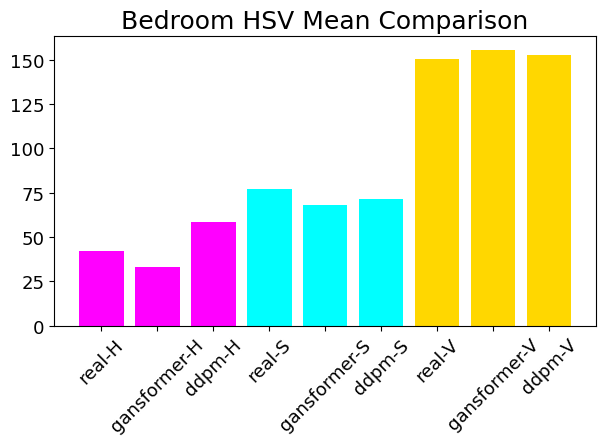

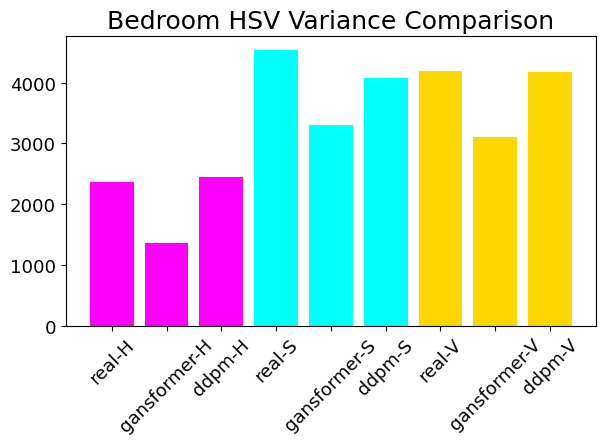

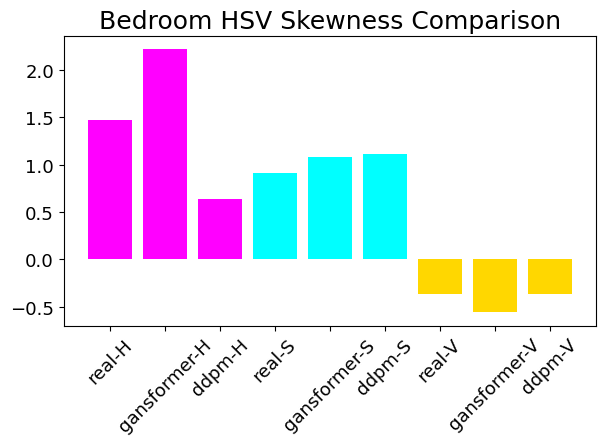

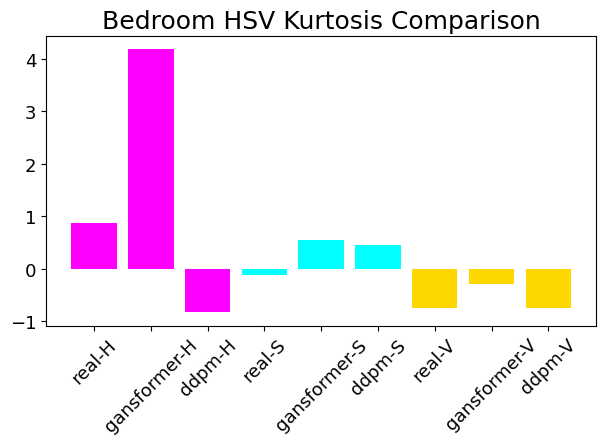


Bedroom YCbCr Channel Moments by Category:
Category: real
  Y: {'mean': 133.81327825401527, 'variance': 4313.321015303313, 'skewness': -0.12876253222835987, 'kurtosis': -0.9132043569391475}
  Cr: {'mean': 137.07739879795562, 'variance': 198.21779024906039, 'skewness': 0.9345555139095435, 'kurtosis': 4.788954567714923}
  Cb: {'mean': 118.21973070022503, 'variance': 200.89319366606247, 'skewness': -0.750099336858237, 'kurtosis': 2.819832421111615}
Category: gansformer
  Y: {'mean': 141.64549876, 'variance': 3318.2818372308507, 'skewness': -0.3813381401424227, 'kurtosis': -0.5839012944114135}
  Cr: {'mean': 136.301733905, 'variance': 102.20984471557449, 'skewness': 1.0117117192597724, 'kurtosis': 3.494691324499671}
  Cb: {'mean': 117.24582879, 'variance': 116.41003812600775, 'skewness': -0.5831915192400832, 'kurtosis': 1.632866379404894}
Category: ddpm
  Y: {'mean': 136.01291826171874, 'variance': 4234.623791354178, 'skewness': -0.14772276857726377, 'kurtosis': -0.8872187399097529}
  Cr:

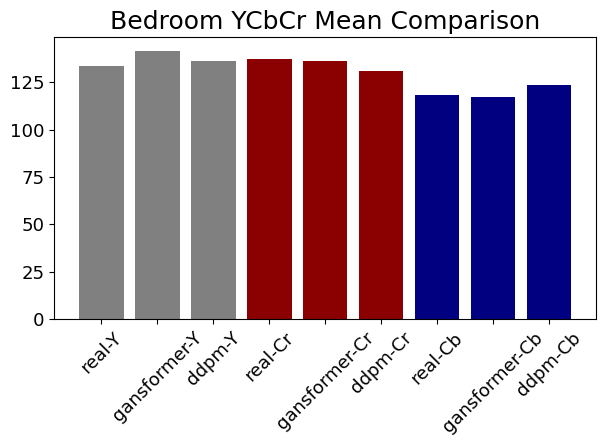

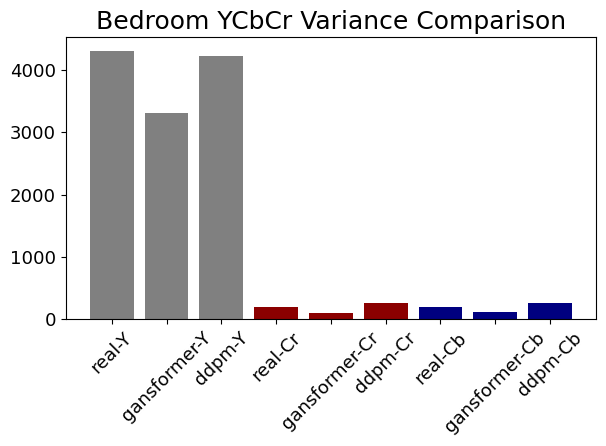

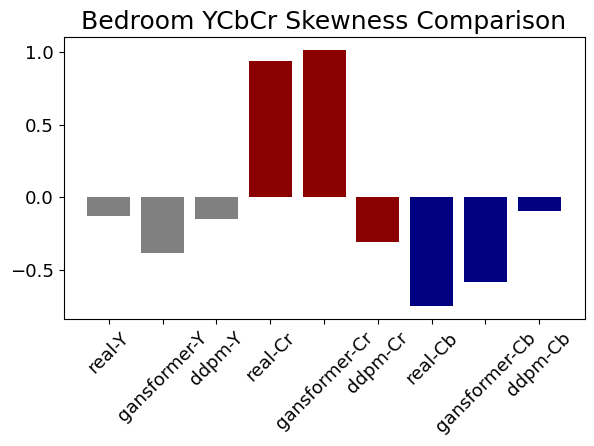

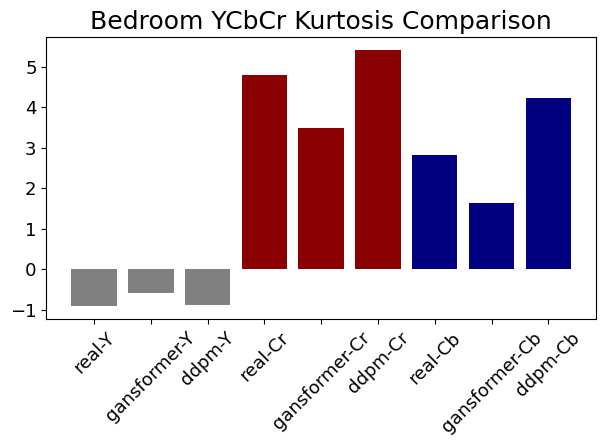

In [31]:
#!/usr/bin/env python3
"""
Color Distribution Analysis for Hierarchical Datasets

This script analyzes color distributions across three main categories
(`real`, `gan`, `diffusion`), each containing many subfolders of images.
It:
  1. Recursively loads all images under each category directory
  2. Computes RGB channel moments (mean, variance, skewness, kurtosis)
  3. Computes normalized RGB histograms
  4. Computes channel moments in HSV and YCbCr spaces
  5. Plots comparative bar charts and histograms across categories

Requirements:
    - Python 3.x
    - numpy
    - scipy
    - matplotlib
    - pillow
    - opencv-python

Usage:
    1. Arrange your data root:
         data/BEST/face/real/
         data/BEST/face/gan/
         data/BEST/face/diffusion/
       Each category folder may contain nested subfolders.
    2. Run:
         python color_distribution_analysis.py
"""
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images_recursive(root_folder, exts=None):
    """
    Recursively walk root_folder and load all images into a list of arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    images = []
    for dirpath, _, filenames in os.walk(root_folder):
        for fname in filenames:
            if os.path.splitext(fname.lower())[1] not in exts:
                continue
            path = os.path.join(dirpath, fname)
            try:
                with Image.open(path) as img:
                    images.append(np.array(img.convert('RGB')))
            except Exception as e:
                print(f"Warning: failed to load {path}: {e}")
    return images


def compute_rgb_moments(images):
    pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)
    moments = {}
    for i, ch in enumerate(['R','G','B']):
        data = pixels[:, i]
        moments[ch] = {
            'mean': np.mean(data),
            'variance': np.var(data),
            'skewness': skew(data),
            'kurtosis': kurtosis(data)
        }
    return moments


def compute_rgb_histograms(images, bins=256, normalize=True):
    hist_sum = {ch: np.zeros(bins) for ch in ['R','G','B']}
    for img in images:
        for i, ch in enumerate(['R','G','B']):
            h, edges = np.histogram(img[...,i].flatten(), bins=bins, range=(0,255))
            hist_sum[ch] += h
    if normalize:
        total = sum(hist_sum.values())[0] if False else None
        for ch in hist_sum:
            hist_sum[ch] = hist_sum[ch] / hist_sum[ch].sum()
    return hist_sum, edges


def convert_and_compute_moments(images, space='HSV'):
    if space.upper() == 'HSV':
        flag = cv2.COLOR_RGB2HSV
        names = ['H','S','V']
    elif space.upper() == 'YCBCR':
        flag = cv2.COLOR_RGB2YCrCb
        names = ['Y','Cr','Cb']
    else:
        raise ValueError(f"Unknown color space: {space}")
    conv = [cv2.cvtColor(img, flag) for img in images]
    pix = np.concatenate([c.reshape(-1,3) for c in conv], axis=0)
    moments = {}
    for i, name in enumerate(names):
        d = pix[:, i]
        moments[name] = {
            'mean': np.mean(d),
            'variance': np.var(d),
            'skewness': skew(d),
            'kurtosis': kurtosis(d)
        }
    return moments


def plot_comparison(moments_dict, title_prefix, channel_names):
    """Plot bar charts for each statistical moment across categories."""
    categories = list(moments_dict.keys())
    stats = ['mean', 'variance', 'skewness', 'kurtosis']
    channel_colors = {'R': 'red', 'G': 'green', 'B': 'blue',  # RGB
                      'H': 'magenta', 'S': 'cyan', 'V': 'gold', # HSV
                      'Y': 'gray', 'Cr': 'darkred', 'Cb': 'navy'} # YCbCr

    for stat in stats:
        plt.figure()
        for ch in channel_names:
            values = [moments_dict[cat][ch][stat] for cat in categories]
            plt.bar([f"{cat}-{ch}" for cat in categories], values, color=channel_colors.get(ch, 'gray'))
        plt.xticks(rotation=45)
        plt.title(f"Bedroom {title_prefix} {stat.capitalize()} Comparison")
        plt.tight_layout()
        plt.show()


def plot_histograms(per_cat_hists, bin_edges):
    """Plot normalized RGB histograms for each category."""
    channel_colors = {'R': 'red', 'G': 'green', 'B': 'blue'}
    for cat, hist_sum in per_cat_hists.items():
        plt.figure()
        for ch in ['R','G','B']:
            plt.plot(bin_edges[:-1], hist_sum[ch], label=ch, color=channel_colors[ch])
        plt.title(f"Bedroom RGB Histogram - {cat}")
        plt.legend()
        plt.tight_layout()
        plt.show()



def main():
    base_dir = '../data/BEST/bedroom'
    categories = ['real','gansformer','ddpm']

    # Load images per category
    datasets = {}
    for cat in categories:
        path = os.path.join(base_dir, cat)
        imgs = load_images_recursive(path)
        print(f"Loaded {len(imgs)} images for category '{cat}'")
        datasets[cat] = imgs

    # RGB moments
    rgb_moments = {cat: compute_rgb_moments(imgs) for cat, imgs in datasets.items()}
    print("\nBedroom RGB Channel Moments by Category:")
    for cat, mom in rgb_moments.items():
        print(f"Category: {cat}")
        for ch, stats in mom.items(): print(f"  {ch}: {stats}")
    plot_comparison(rgb_moments, "RGB", ['R','G','B'])

    # RGB histograms
    per_cat_hists = {}
    for cat, imgs in datasets.items():
        h, edges = compute_rgb_histograms(imgs)
        per_cat_hists[cat] = h
    plot_histograms(per_cat_hists, edges)

    # HSV and YCbCr moments & plots
    for space, ch_names in [('HSV', ['H','S','V']), ('YCbCr', ['Y','Cr','Cb'])]:
        alt_mom = {cat: convert_and_compute_moments(imgs, space) for cat, imgs in datasets.items()}
        print(f"\nBedroom {space} Channel Moments by Category:")
        for cat, mom in alt_mom.items():
            print(f"Category: {cat}")
            for ch, stats in mom.items(): print(f"  {ch}: {stats}")
        plot_comparison(alt_mom, space, ch_names)

if __name__ == '__main__':
    main()
    plt.show()


## Bedroom Variance and Kurtosis for Real vs. GAN vs. Diffusion Bedrooms

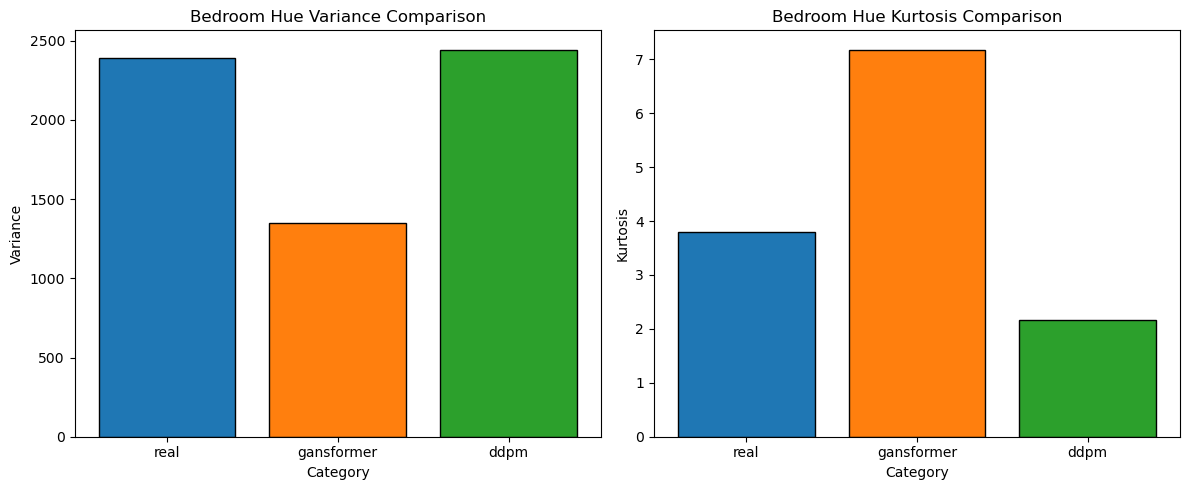

In [9]:
#!/usr/bin/env python3
"""
Plot Hue Variance and Kurtosis for Real vs. GAN vs. Diffusion Bedrooms
(with custom bar colors)
"""

import os
import glob
import numpy as np
from PIL import Image
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images(folder):
    imgs = []
    for path in glob.glob(os.path.join(folder, '*')):
        try:
            with Image.open(path) as im:
                imgs.append(np.array(im.convert('RGB')))
        except:
            pass
    return imgs

def hsv_h_moments(images):
    # stack all H channel pixels
    h_vals = []
    for img in images:
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        h_vals.append(hsv[...,0].flatten())
    h = np.concatenate(h_vals)
    return {
        'variance': np.var(h),
        'kurtosis': kurtosis(h, fisher=False)  # Pearson’s kurtosis
    }

def main():
    base_dir = '../data/BEST/bedroom'
    categories = ['real', 'gansformer', 'ddpm']

    # define a distinct color for each bar
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

    hue_var = []
    hue_kurt = []
    for cat in categories:
        imgs = load_images(os.path.join(base_dir, cat))
        moments = hsv_h_moments(imgs)
        hue_var.append(moments['variance'])
        hue_kurt.append(moments['kurtosis'])

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Hue Variance
    axes[0].bar(categories, hue_var, color=colors, edgecolor='black')
    axes[0].set_title('Bedroom Hue Variance Comparison')
    axes[0].set_ylabel('Variance')
    axes[0].set_xlabel('Category')

    # Hue Kurtosis
    axes[1].bar(categories, hue_kurt, color=colors, edgecolor='black')
    axes[1].set_title('Bedroom Hue Kurtosis Comparison')
    axes[1].set_ylabel('Kurtosis')
    axes[1].set_xlabel('Category')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

## Face results:

Loaded 6000 images for category 'real'
Loaded 6000 images for category 'stylegan2'
Loaded 5999 images for category 'palette'

 Face RGB Channel Moments by Category:
Category: real
  R: {'mean': 133.50690660833334, 'variance': 5134.029967965377, 'skewness': -0.14522948354489, 'kurtosis': -1.1276867684340162}
  G: {'mean': 109.24532605, 'variance': 4248.078005987524, 'skewness': 0.22656304283418224, 'kurtosis': -0.8737853009094612}
  B: {'mean': 97.79143279583333, 'variance': 4296.306957300551, 'skewness': 0.507398070548417, 'kurtosis': -0.6035659024382549}
Category: stylegan2
  R: {'mean': 141.62263036666667, 'variance': 4473.792275093174, 'skewness': -0.305954352610196, 'kurtosis': -0.999490250501307}
  G: {'mean': 111.5859153375, 'variance': 3411.1371225548028, 'skewness': 0.038014023622279916, 'kurtosis': -0.8167866304116473}
  B: {'mean': 97.39745035833333, 'variance': 3327.3536775709895, 'skewness': 0.34508900116595326, 'kurtosis': -0.5376102600243864}
Category: palette
  R: {'mean

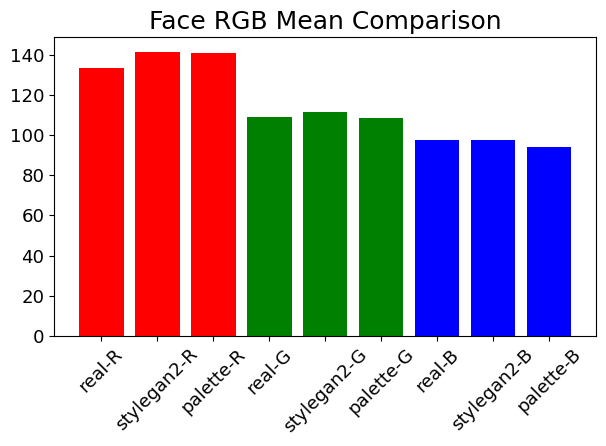

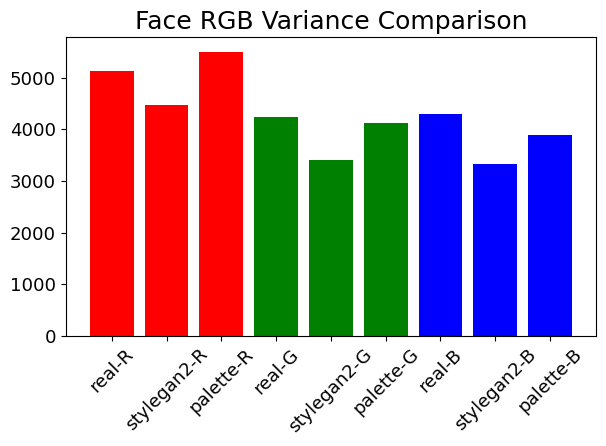

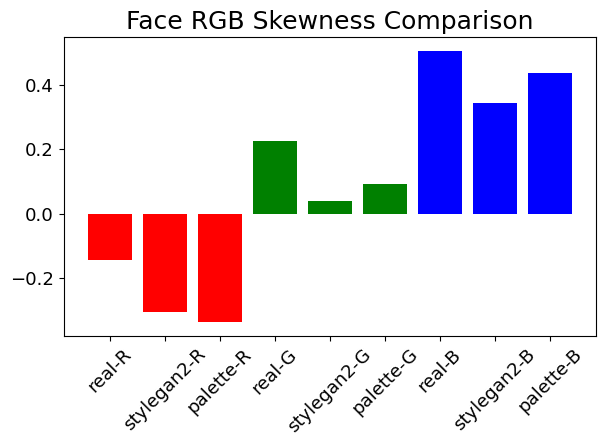

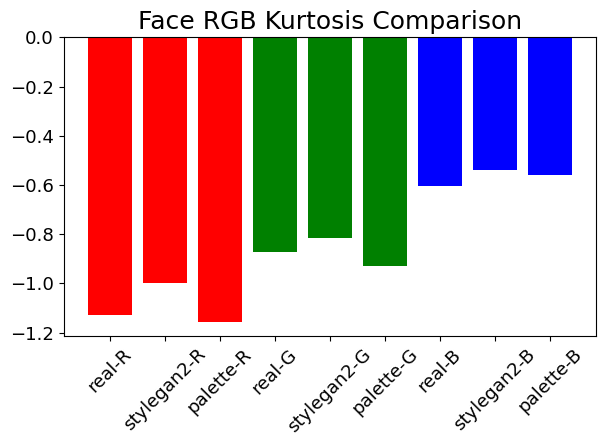

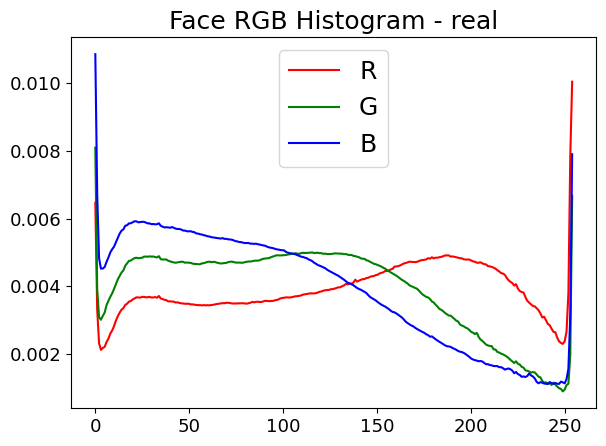

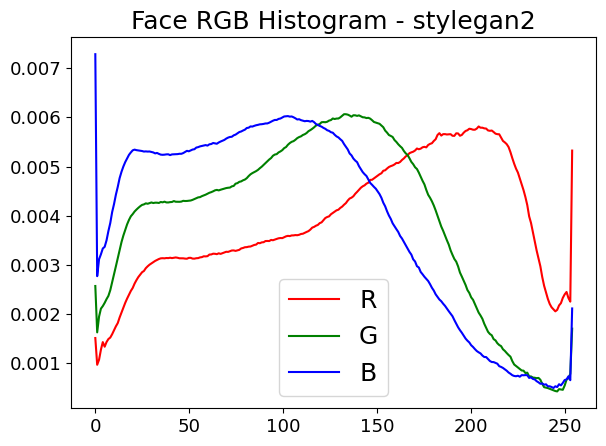

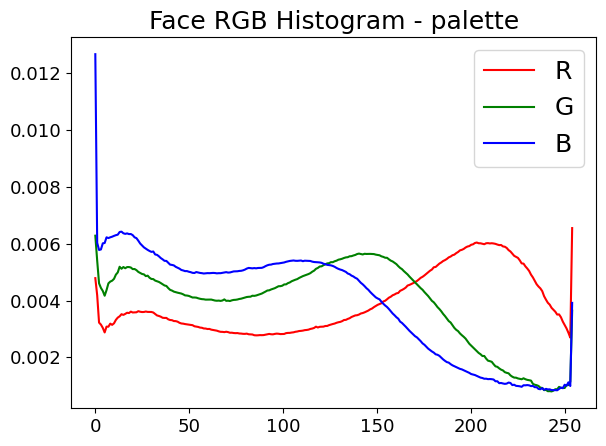


Face HSV Channel Moments by Category:
Category: real
  H: {'mean': 40.958190425, 'variance': 2799.755712951121, 'skewness': 1.4311563800648939, 'kurtosis': 0.6172984122923073}
  S: {'mean': 93.15120924583333, 'variance': 3512.5111351848277, 'skewness': 0.5696567108306825, 'kurtosis': -0.09358967475555025}
  V: {'mean': 138.9215047125, 'variance': 5015.843186010663, 'skewness': -0.19369477372764676, 'kurtosis': -1.0867961361459924}
Category: stylegan2
  H: {'mean': 27.568139445833335, 'variance': 1853.9038884825957, 'skewness': 2.3824640441014666, 'kurtosis': 4.4743083164913715}
  S: {'mean': 93.96019248333333, 'variance': 2569.8322997532787, 'skewness': 0.5367084433983792, 'kurtosis': 0.4816439779447341}
  V: {'mean': 144.0627799625, 'variance': 4392.095540580436, 'skewness': -0.32299547349711905, 'kurtosis': -0.971080969652395}
Category: palette
  H: {'mean': 29.82970967661277, 'variance': 2154.9388272601013, 'skewness': 2.159992312379343, 'kurtosis': 3.3006123542519}
  S: {'mean': 9

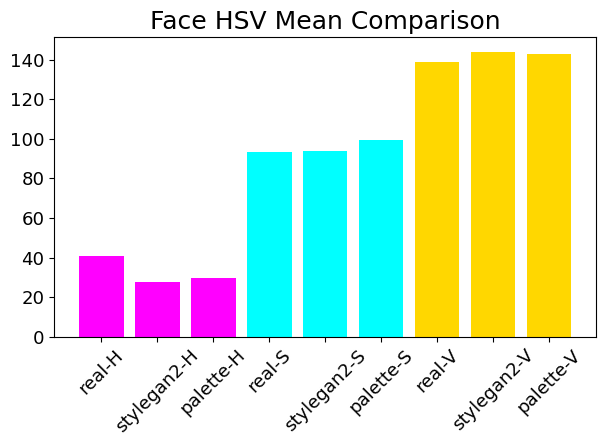

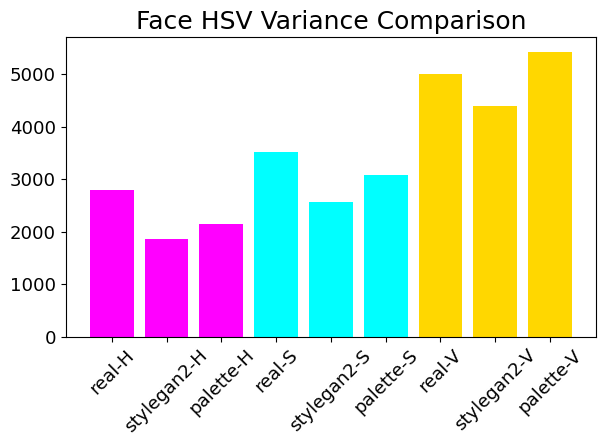

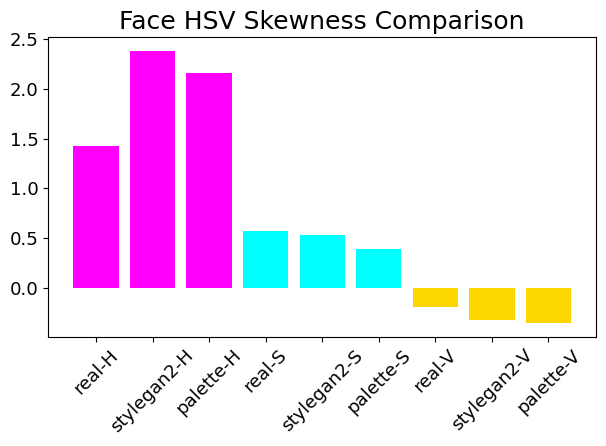

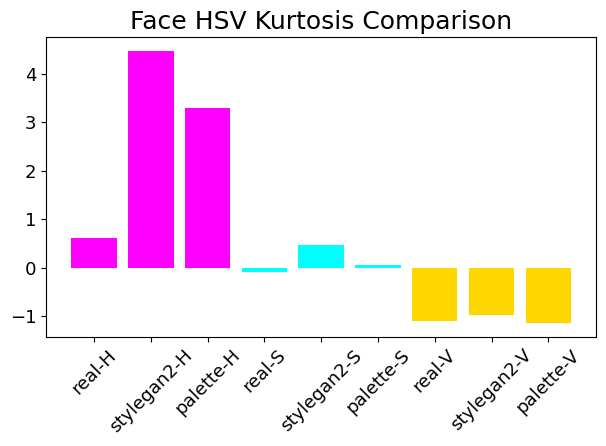


Face YCbCr Channel Moments by Category:
Category: real
  Y: {'mean': 115.19387000833333, 'variance': 4221.151724778232, 'skewness': 0.11329047028883873, 'kurtosis': -0.953592630907711}
  Cr: {'mean': 141.07656477083333, 'variance': 290.5368431983652, 'skewness': 0.26787900055475, 'kurtosis': 3.5249484924307097}
  Cb: {'mean': 118.182114225, 'variance': 207.27061410072045, 'skewness': 0.3205653816635411, 'kurtosis': 5.012438287797904}
Category: stylegan2
  Y: {'mean': 118.95649627083333, 'variance': 3527.4793798213955, 'skewness': -0.0823144322919207, 'kurtosis': -0.9084592609846625}
  Cr: {'mean': 144.19049360416668, 'variance': 193.48362892427073, 'skewness': -0.13761695036540816, 'kurtosis': 2.942264954926684}
  Cb: {'mean': 115.8290320875, 'variance': 124.94332306872862, 'skewness': 0.7142602557738976, 'kurtosis': 7.545083811154679}
Category: palette
  Y: {'mean': 116.61735446324387, 'variance': 4296.044627838288, 'skewness': -0.059879210422612406, 'kurtosis': -1.0469677516363536}


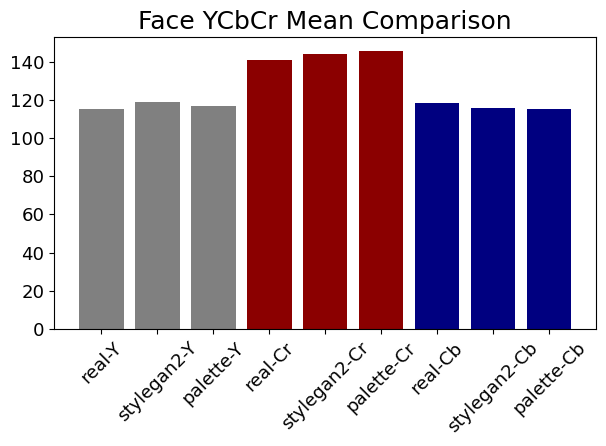

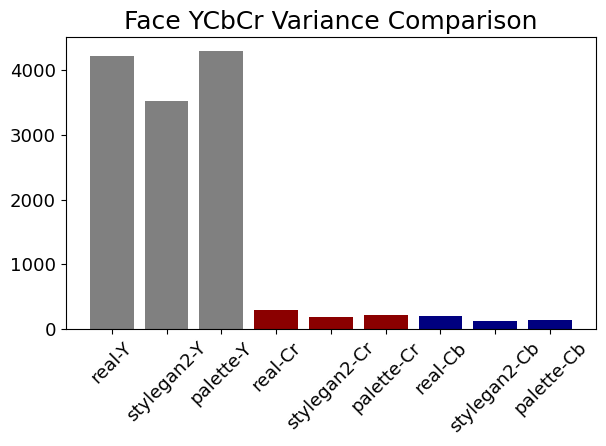

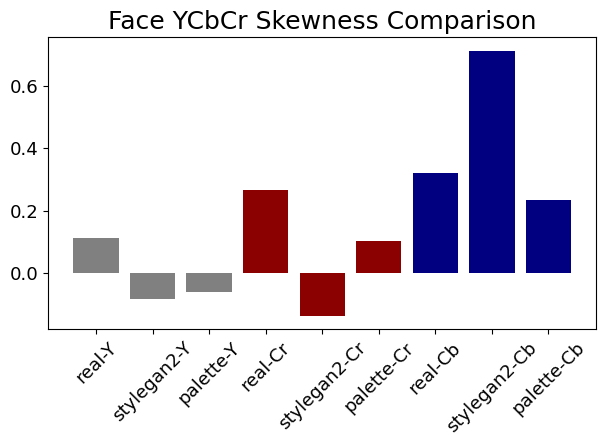

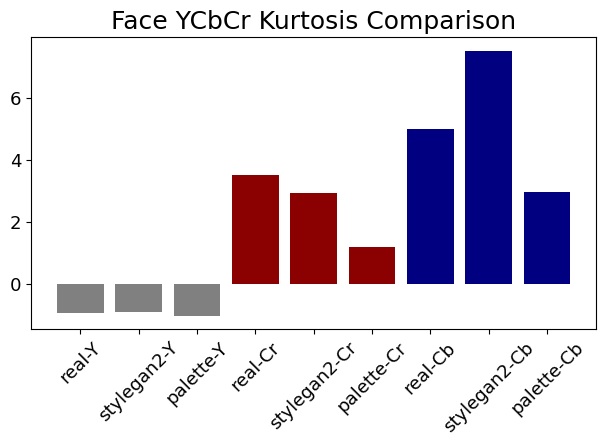

In [32]:
#!/usr/bin/env python3
"""
Color Distribution Analysis for Hierarchical Datasets

This script analyzes color distributions across three main categories
(`real`, `gan`, `diffusion`), each containing many subfolders of images.
It:
  1. Recursively loads all images under each category directory
  2. Computes RGB channel moments (mean, variance, skewness, kurtosis)
  3. Computes normalized RGB histograms
  4. Computes channel moments in HSV and YCbCr spaces
  5. Plots comparative bar charts and histograms across categories

Requirements:
    - Python 3.x
    - numpy
    - scipy
    - matplotlib
    - pillow
    - opencv-python

Usage:
    1. Arrange your data root:
         data/BEST/face/real/
         data/BEST/face/gan/
         data/BEST/face/diffusion/
       Each category folder may contain nested subfolders.
    2. Run:
         python color_distribution_analysis.py
"""
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images_recursive(root_folder, exts=None):
    """
    Recursively walk root_folder and load all images into a list of arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    images = []
    for dirpath, _, filenames in os.walk(root_folder):
        for fname in filenames:
            if os.path.splitext(fname.lower())[1] not in exts:
                continue
            path = os.path.join(dirpath, fname)
            try:
                with Image.open(path) as img:
                    images.append(np.array(img.convert('RGB')))
            except Exception as e:
                print(f"Warning: failed to load {path}: {e}")
    return images


def compute_rgb_moments(images):
    pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)
    moments = {}
    for i, ch in enumerate(['R','G','B']):
        data = pixels[:, i]
        moments[ch] = {
            'mean': np.mean(data),
            'variance': np.var(data),
            'skewness': skew(data),
            'kurtosis': kurtosis(data)
        }
    return moments


def compute_rgb_histograms(images, bins=256, normalize=True):
    hist_sum = {ch: np.zeros(bins) for ch in ['R','G','B']}
    for img in images:
        for i, ch in enumerate(['R','G','B']):
            h, edges = np.histogram(img[...,i].flatten(), bins=bins, range=(0,255))
            hist_sum[ch] += h
    if normalize:
        total = sum(hist_sum.values())[0] if False else None
        for ch in hist_sum:
            hist_sum[ch] = hist_sum[ch] / hist_sum[ch].sum()
    return hist_sum, edges


def convert_and_compute_moments(images, space='HSV'):
    if space.upper() == 'HSV':
        flag = cv2.COLOR_RGB2HSV
        names = ['H','S','V']
    elif space.upper() == 'YCBCR':
        flag = cv2.COLOR_RGB2YCrCb
        names = ['Y','Cr','Cb']
    else:
        raise ValueError(f"Unknown color space: {space}")
    conv = [cv2.cvtColor(img, flag) for img in images]
    pix = np.concatenate([c.reshape(-1,3) for c in conv], axis=0)
    moments = {}
    for i, name in enumerate(names):
        d = pix[:, i]
        moments[name] = {
            'mean': np.mean(d),
            'variance': np.var(d),
            'skewness': skew(d),
            'kurtosis': kurtosis(d)
        }
    return moments


def plot_comparison(moments_dict, title_prefix, channel_names):
    """Plot bar charts for each statistical moment across categories."""
    categories = list(moments_dict.keys())
    stats = ['mean', 'variance', 'skewness', 'kurtosis']
    channel_colors = {'R': 'red', 'G': 'green', 'B': 'blue',  # RGB
                      'H': 'magenta', 'S': 'cyan', 'V': 'gold', # HSV
                      'Y': 'gray', 'Cr': 'darkred', 'Cb': 'navy'} # YCbCr

    for stat in stats:
        plt.figure()
        for ch in channel_names:
            values = [moments_dict[cat][ch][stat] for cat in categories]
            plt.bar([f"{cat}-{ch}" for cat in categories], values, color=channel_colors.get(ch, 'gray'))
        plt.xticks(rotation=45)
        plt.title(f"Face {title_prefix} {stat.capitalize()} Comparison")
        plt.tight_layout()
        plt.show()


def plot_histograms(per_cat_hists, bin_edges):
    """Plot normalized RGB histograms for each category."""
    channel_colors = {'R': 'red', 'G': 'green', 'B': 'blue'}
    for cat, hist_sum in per_cat_hists.items():
        plt.figure()
        for ch in ['R','G','B']:
            plt.plot(bin_edges[:-1], hist_sum[ch], label=ch, color=channel_colors[ch])
        plt.title(f"Face RGB Histogram - {cat}")
        plt.legend()
        plt.tight_layout()
        plt.show()



def main():
    base_dir = '../data/BEST/face/'  
    categories = ['real', 'stylegan2', 'palette']

    # Load images per category
    datasets = {}
    for cat in categories:
        path = os.path.join(base_dir, cat)
        imgs = load_images_recursive(path)
        print(f"Loaded {len(imgs)} images for category '{cat}'")
        datasets[cat] = imgs

    # RGB moments
    rgb_moments = {cat: compute_rgb_moments(imgs) for cat, imgs in datasets.items()}
    print("\n Face RGB Channel Moments by Category:")
    for cat, mom in rgb_moments.items():
        print(f"Category: {cat}")
        for ch, stats in mom.items(): print(f"  {ch}: {stats}")
    plot_comparison(rgb_moments, "RGB", ['R','G','B'])

    # RGB histograms
    per_cat_hists = {}
    for cat, imgs in datasets.items():
        h, edges = compute_rgb_histograms(imgs)
        per_cat_hists[cat] = h
    plot_histograms(per_cat_hists, edges)

    # HSV and YCbCr moments & plots
    for space, ch_names in [('HSV', ['H','S','V']), ('YCbCr', ['Y','Cr','Cb'])]:
        alt_mom = {cat: convert_and_compute_moments(imgs, space) for cat, imgs in datasets.items()}
        print(f"\nFace {space} Channel Moments by Category:")
        for cat, mom in alt_mom.items():
            print(f"Category: {cat}")
            for ch, stats in mom.items(): print(f"  {ch}: {stats}")
        plot_comparison(alt_mom, space, ch_names)

if __name__ == '__main__':
    main()

## Face YCbCr Cr Means and Cb Variances for Real vs. GAN vs. Diffusion Images

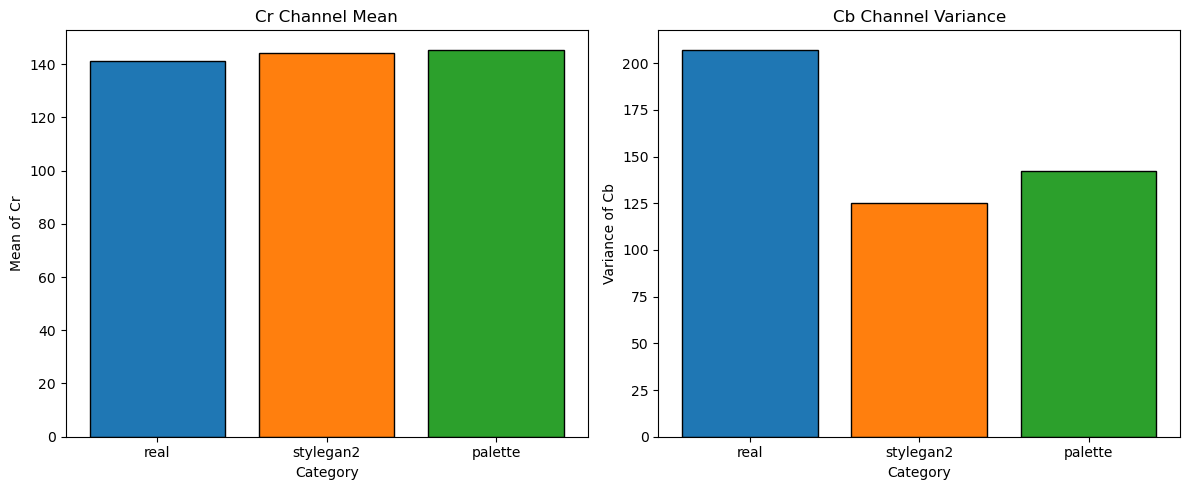

In [ ]:
#!/usr/bin/env python3
"""
Plot YCbCr Cr Means and Cb Variances for Real vs. GAN vs. Diffusion Images
(gracefully handles empty folders)
"""

import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def load_images(folder):
    imgs = []
    for path in glob.glob(os.path.join(folder, '*')):
        try:
            with Image.open(path) as im:
                imgs.append(np.array(im.convert('RGB')))
        except Exception as e:
            print(f"Warning: could not load {path}: {e}")
    return imgs

def ycbcr_stats(images):
    """
    Returns {'Cr_mean': ..., 'Cb_var': ...} or None if no images.
    """
    if not images:
        return None

    cr_vals, cb_vals = [], []
    for img in images:
        ycb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        cr_vals.append(ycb[...,1].flatten())
        cb_vals.append(ycb[...,2].flatten())

    cr = np.concatenate(cr_vals)
    cb = np.concatenate(cb_vals)
    return {
        'Cr_mean': np.mean(cr),
        'Cb_var' : np.var(cb)
    }

def main():
    base_dir = '../data/BEST/face'  # adjust as needed
    categories = ['real', 'stylegan2', 'palette']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    cr_means = []
    cb_vars  = []
    valid_cats = []

    for cat in categories:
        folder = os.path.join(base_dir, cat)
        imgs   = load_images(folder)
        stats  = ycbcr_stats(imgs)
        if stats is None:
            print(f"Warning: no images found in {folder}, skipping.")
            continue

        valid_cats.append(cat)
        cr_means.append(stats['Cr_mean'])
        cb_vars.append(stats['Cb_var'])

    if not valid_cats:
        print("Error: no valid categories with images found – nothing to plot.")
        return

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Cr mean
    axes[0].bar(valid_cats, cr_means, color=colors[:len(valid_cats)], edgecolor='black')
    axes[0].set_title('Face Cr Channel Mean')
    axes[0].set_xlabel('Category')
    axes[0].set_ylabel('Mean of Cr')

    # Cb variance
    axes[1].bar(valid_cats, cb_vars, color=colors[:len(valid_cats)], edgecolor='black')
    axes[1].set_title('Face Cb Channel Variance')
    axes[1].set_xlabel('Category')
    axes[1].set_ylabel('Variance of Cb')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

## ImageNet:

Loaded 10000 images for category 'real_imagenet'
Loaded 10000 images for category 'big_gan'
Loaded 10000 images for category 'vq_diffusion'

ImageNet RGB Channel Moments by Category:
Category: real_imagenet
  R: {'mean': 89.52207061, 'variance': 6634.777449778213, 'skewness': 0.4185843029022787, 'kurtosis': -1.1093661597123672}
  G: {'mean': 85.648849985, 'variance': 6208.978625941858, 'skewness': 0.47661412379079104, 'kurtosis': -0.9900673479175963}
  B: {'mean': 75.7701211525, 'variance': 5936.803675062871, 'skewness': 0.7509018083412408, 'kurtosis': -0.6101601844951743}
Category: big_gan
  R: {'mean': 120.8621561675, 'variance': 4064.5759452553666, 'skewness': 0.09981552724184196, 'kurtosis': -0.7934236733111106}
  G: {'mean': 115.2164107175, 'variance': 3820.8507177888496, 'skewness': 0.19756677805582307, 'kurtosis': -0.666966873271658}
  B: {'mean': 101.5192135825, 'variance': 4433.520346953235, 'skewness': 0.5073085338549758, 'kurtosis': -0.6254464662793024}
Category: vq_diffusio

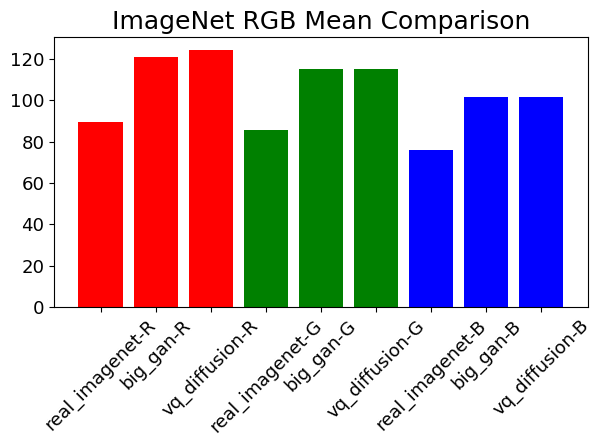

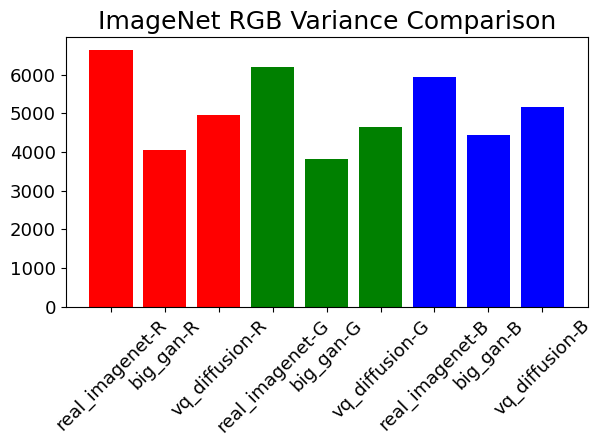

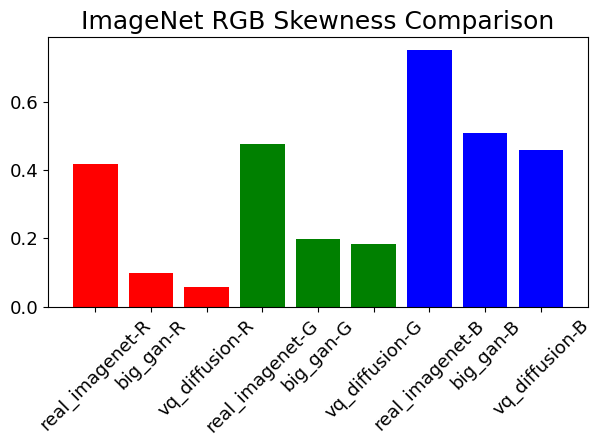

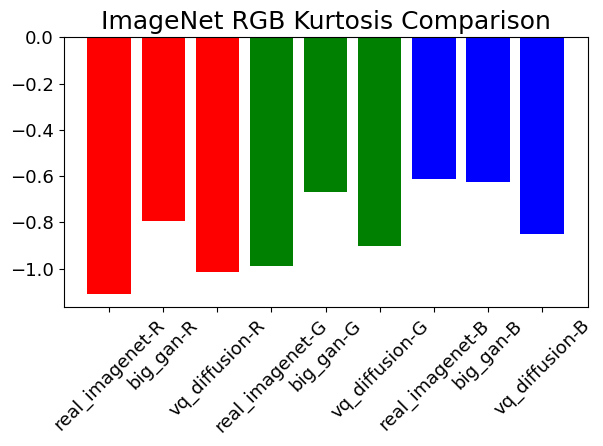

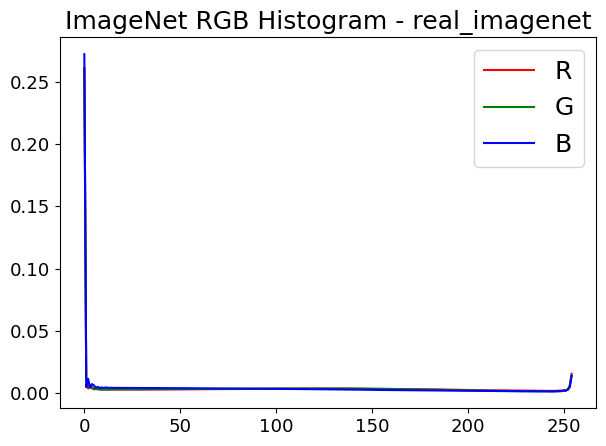

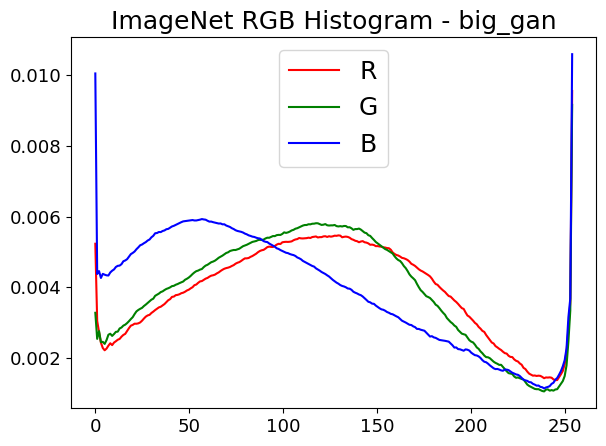

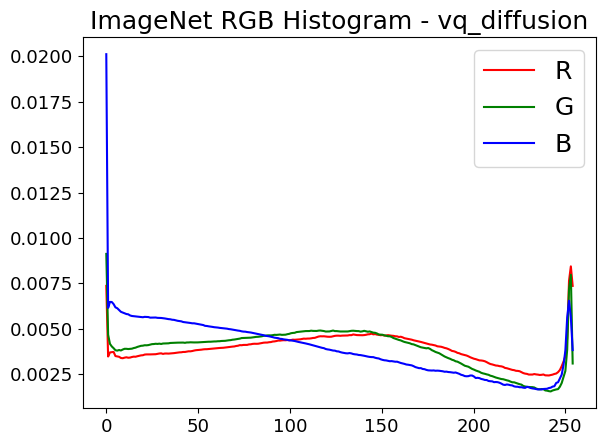


 ImageNet HSV Channel Moments by Category:
Category: real_imagenet
  H: {'mean': 39.7251038325, 'variance': 2211.666615539667, 'skewness': 1.2180384274924914, 'kurtosis': 0.4406172297892068}
  S: {'mean': 70.4043212325, 'variance': 6231.795688413369, 'skewness': 1.0438417340292256, 'kurtosis': -0.0524064273953484}
  V: {'mean': 97.2325385525, 'variance': 7065.529286324289, 'skewness': 0.28434556353748275, 'kurtosis': -1.2519168799638345}
Category: big_gan
  H: {'mean': 49.4534958175, 'variance': 2228.2021055259884, 'skewness': 1.0551958640131174, 'kurtosis': -0.027405808497220185}
  S: {'mean': 77.704110825, 'variance': 4189.53165188113, 'skewness': 0.88521893457343, 'kurtosis': 0.010573565771164972}
  V: {'mean': 130.5679929675, 'variance': 4040.4061760763343, 'skewness': -0.012543637635081312, 'kurtosis': -0.7958058681994911}
Category: vq_diffusion
  H: {'mean': 57.809834085, 'variance': 2895.678557999772, 'skewness': 0.7756060705520491, 'kurtosis': -0.7663985570622671}
  S: {'mean'

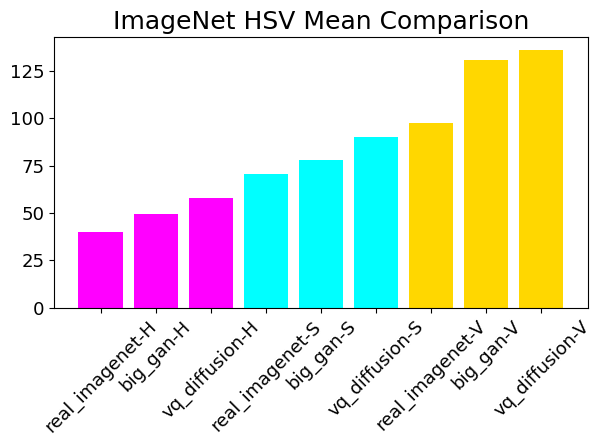

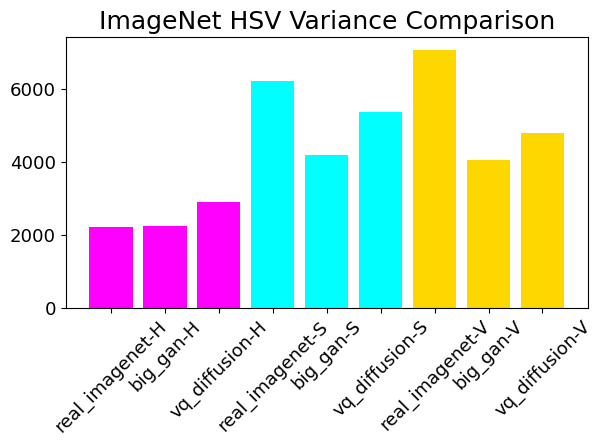

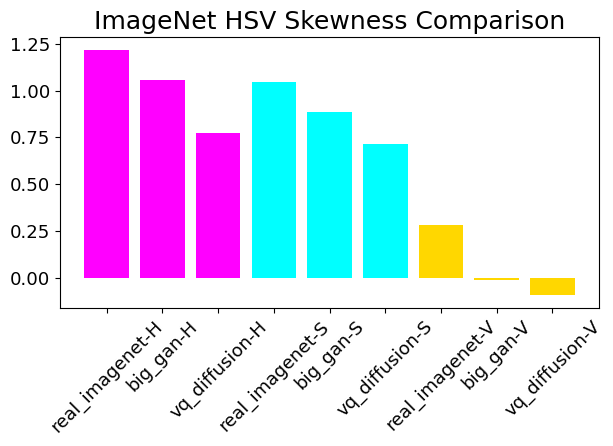

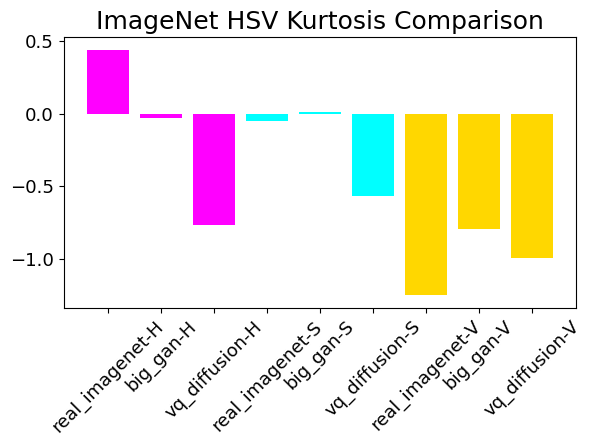


 ImageNet YCbCr Channel Moments by Category:
Category: real_imagenet
  Y: {'mean': 85.6817501975, 'variance': 6068.414943000741, 'skewness': 0.4670069929440109, 'kurtosis': -0.9733061928240669}
  Cr: {'mean': 130.73988167, 'variance': 200.04540190439485, 'skewness': 1.2111809928976656, 'kurtosis': 10.065268502596664}
  Cb: {'mean': 122.400264055, 'variance': 225.8210103612729, 'skewness': -0.9583303612601429, 'kurtosis': 5.951082782429886}
Category: big_gan
  Y: {'mean': 115.34421578, 'variance': 3673.4999669367744, 'skewness': 0.2213601041273515, 'kurtosis': -0.6082544719122298}
  Cr: {'mean': 131.94012026, 'variance': 247.61521126173596, 'skewness': 0.45791788299986436, 'kurtosis': 8.564205953835582}
  Cb: {'mean': 120.195855305, 'variance': 271.9031712545001, 'skewness': -0.19639357129841814, 'kurtosis': 4.671500410088282}
Category: vq_diffusion
  Y: {'mean': 116.398727995, 'variance': 4367.469696676003, 'skewness': 0.1988497179280034, 'kurtosis': -0.8318884259052752}
  Cr: {'mean'

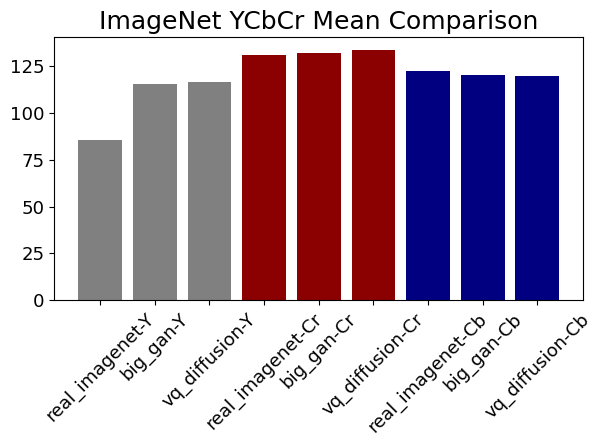

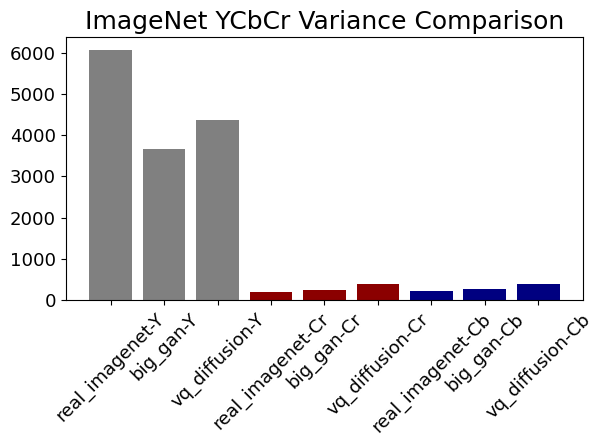

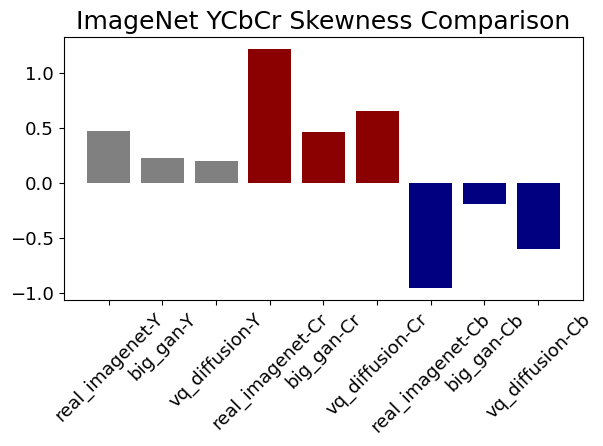

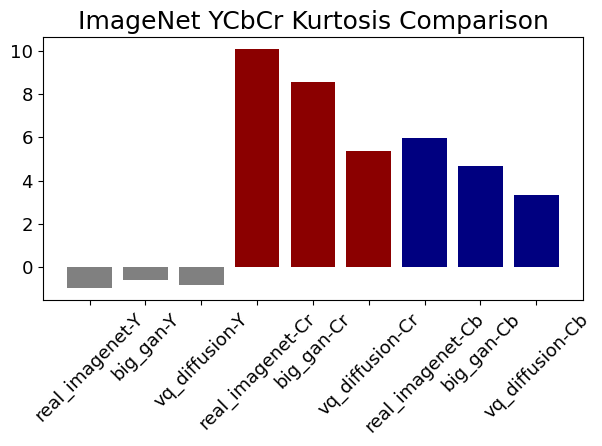

In [27]:
#!/usr/bin/env python3
"""
Color Distribution Analysis for Hierarchical Datasets

This script analyzes color distributions across three main categories
(`real`, `gan`, `diffusion`), each containing many subfolders of images.
It:
  1. Recursively loads all images under each category directory
  2. Computes RGB channel moments (mean, variance, skewness, kurtosis)
  3. Computes normalized RGB histograms
  4. Computes channel moments in HSV and YCbCr spaces
  5. Plots comparative bar charts and histograms across categories

Requirements:
    - Python 3.x
    - numpy
    - scipy
    - matplotlib
    - pillow
    - opencv-python

Usage:
    1. Arrange your data root:
         data/BEST/face/real/
         data/BEST/face/gan/
         data/BEST/face/diffusion/
       Each category folder may contain nested subfolders.
    2. Run:
         python color_distribution_analysis.py
"""
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images_recursive(root_folder, exts=None):
    """
    Recursively walk root_folder and load all images into a list of arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    images = []
    for dirpath, _, filenames in os.walk(root_folder):
        for fname in filenames:
            if os.path.splitext(fname.lower())[1] not in exts:
                continue
            path = os.path.join(dirpath, fname)
            try:
                with Image.open(path) as img:
                    images.append(np.array(img.convert('RGB')))
            except Exception as e:
                print(f"Warning: failed to load {path}: {e}")
    return images


def compute_rgb_moments(images):
    pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)
    moments = {}
    for i, ch in enumerate(['R','G','B']):
        data = pixels[:, i]
        moments[ch] = {
            'mean': np.mean(data),
            'variance': np.var(data),
            'skewness': skew(data),
            'kurtosis': kurtosis(data)
        }
    return moments


def compute_rgb_histograms(images, bins=256, normalize=True):
    hist_sum = {ch: np.zeros(bins) for ch in ['R','G','B']}
    for img in images:
        for i, ch in enumerate(['R','G','B']):
            h, edges = np.histogram(img[...,i].flatten(), bins=bins, range=(0,255))
            hist_sum[ch] += h
    if normalize:
        total = sum(hist_sum.values())[0] if False else None
        for ch in hist_sum:
            hist_sum[ch] = hist_sum[ch] / hist_sum[ch].sum()
    return hist_sum, edges


def convert_and_compute_moments(images, space='HSV'):
    if space.upper() == 'HSV':
        flag = cv2.COLOR_RGB2HSV
        names = ['H','S','V']
    elif space.upper() == 'YCBCR':
        flag = cv2.COLOR_RGB2YCrCb
        names = ['Y','Cr','Cb']
    else:
        raise ValueError(f"Unknown color space: {space}")
    conv = [cv2.cvtColor(img, flag) for img in images]
    pix = np.concatenate([c.reshape(-1,3) for c in conv], axis=0)
    moments = {}
    for i, name in enumerate(names):
        d = pix[:, i]
        moments[name] = {
            'mean': np.mean(d),
            'variance': np.var(d),
            'skewness': skew(d),
            'kurtosis': kurtosis(d)
        }
    return moments


def plot_comparison(moments_dict, title_prefix, channel_names):
    """Plot bar charts for each statistical moment across categories."""
    categories = list(moments_dict.keys())
    stats = ['mean', 'variance', 'skewness', 'kurtosis']
    channel_colors = {'R': 'red', 'G': 'green', 'B': 'blue',  # RGB
                      'H': 'magenta', 'S': 'cyan', 'V': 'gold', # HSV
                      'Y': 'gray', 'Cr': 'darkred', 'Cb': 'navy'} # YCbCr

    for stat in stats:
        plt.figure()
        for ch in channel_names:
            values = [moments_dict[cat][ch][stat] for cat in categories]
            plt.bar([f"{cat}-{ch}" for cat in categories], values, color=channel_colors.get(ch, 'gray'))
        plt.xticks(rotation=45)
        plt.title(f"ImageNet {title_prefix} {stat.capitalize()} Comparison")
        plt.tight_layout()
        plt.show()


def plot_histograms(per_cat_hists, bin_edges):
    """Plot normalized RGB histograms for each category."""
    channel_colors = {'R': 'red', 'G': 'green', 'B': 'blue'}
    for cat, hist_sum in per_cat_hists.items():
        plt.figure()
        for ch in ['R','G','B']:
            plt.plot(bin_edges[:-1], hist_sum[ch], label=ch, color=channel_colors[ch])
        plt.title(f"ImageNet RGB Histogram - {cat}")
        plt.legend()
        plt.tight_layout()
        plt.show()


def main():
    base_dir = '../data/BEST/imagenet/'
    categories = ['real_imagenet', 'big_gan', 'vq_diffusion']

    # Load images per category
    datasets = {}
    for cat in categories:
        path = os.path.join(base_dir, cat)
        imgs = load_images_recursive(path)
        print(f"Loaded {len(imgs)} images for category '{cat}'")
        datasets[cat] = imgs

    # RGB moments
    rgb_moments = {cat: compute_rgb_moments(imgs) for cat, imgs in datasets.items()}
    print("\nImageNet RGB Channel Moments by Category:")
    for cat, mom in rgb_moments.items():
        print(f"Category: {cat}")
        for ch, stats in mom.items(): print(f"  {ch}: {stats}")
    plot_comparison(rgb_moments, "RGB", ['R','G','B'])

    # RGB histograms
    per_cat_hists = {}
    for cat, imgs in datasets.items():
        h, edges = compute_rgb_histograms(imgs)
        per_cat_hists[cat] = h
    plot_histograms(per_cat_hists, edges)

    # HSV and YCbCr moments & plots
    for space, ch_names in [('HSV', ['H','S','V']), ('YCbCr', ['Y','Cr','Cb'])]:
        alt_mom = {cat: convert_and_compute_moments(imgs, space) for cat, imgs in datasets.items()}
        print(f"\n ImageNet {space} Channel Moments by Category:")
        for cat, mom in alt_mom.items():
            print(f"Category: {cat}")
            for ch, stats in mom.items(): print(f"  {ch}: {stats}")
        plot_comparison(alt_mom, space, ch_names)

if __name__ == '__main__':
    main()

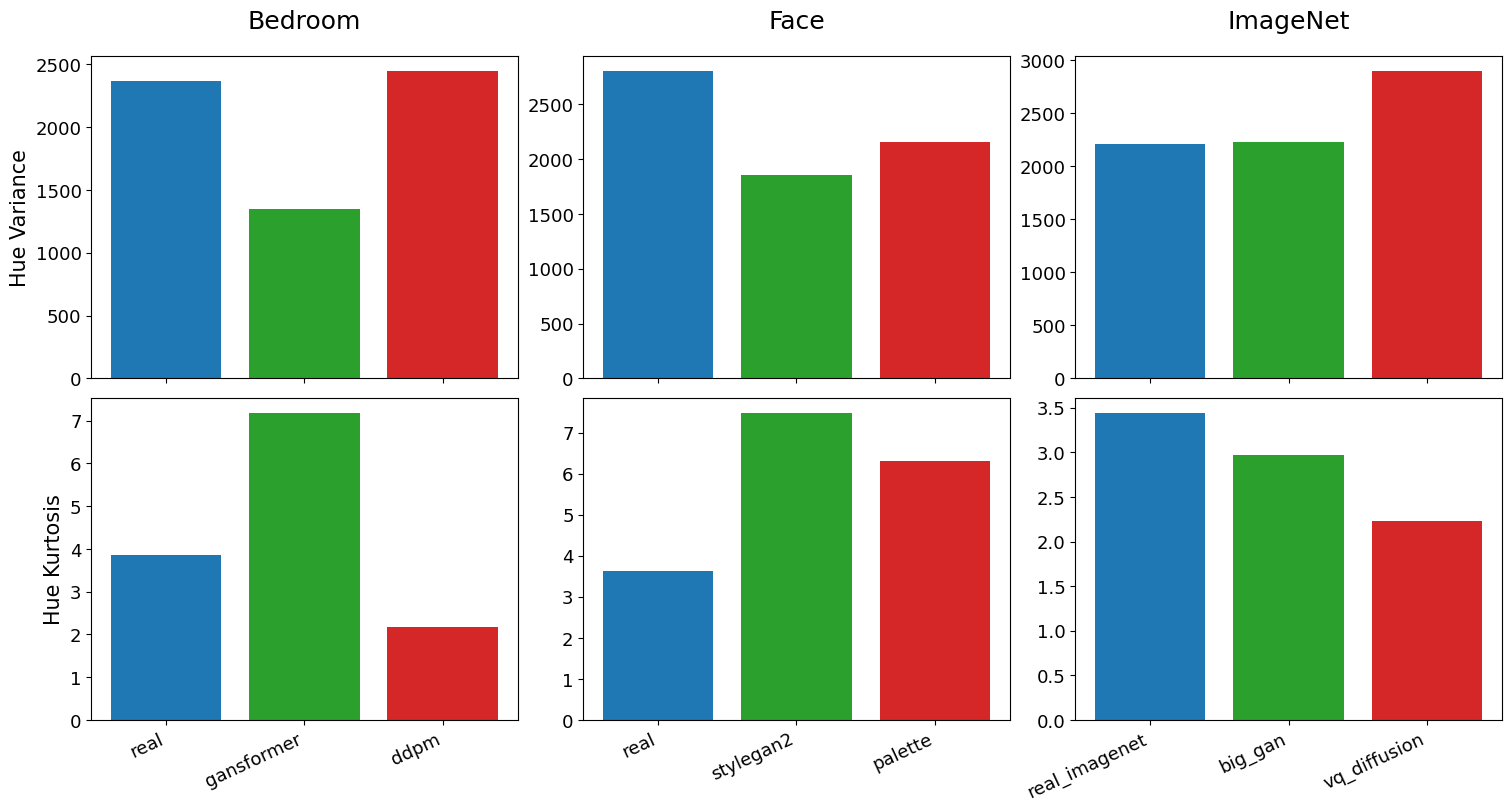

In [25]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from PIL import Image
import cv2

def load_images(folder, recursive=False):
    imgs = []
    if recursive:
        for sub in os.listdir(folder):
            subfolder = os.path.join(folder, sub)
            if not os.path.isdir(subfolder):
                continue
            for path in glob.glob(os.path.join(subfolder, '*')):
                try:
                    with Image.open(path) as im:
                        imgs.append(np.array(im.convert('RGB')))
                except:
                    pass
    else:
        for path in glob.glob(os.path.join(folder, '*')):
            try:
                with Image.open(path) as im:
                    imgs.append(np.array(im.convert('RGB')))
            except:
                pass
    return imgs

def hsv_h_moments(images):
    h_vals = np.concatenate([
        cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[...,0].ravel()
        for img in images
    ])
    return np.var(h_vals), kurtosis(h_vals, fisher=False)

# ─── Parameters ─────────────────────────────────────────────────────────────
root = '../data/BEST'
datasets = {
    'Bedroom':  'bedroom',
    'Face':     'face',
    'ImageNet': 'imagenet'
}
categories_map = {
    'Bedroom':   ['real', 'gansformer', 'ddpm'],
    'Face':      ['real', 'stylegan2', 'palette'],
    'ImageNet':  ['real_imagenet', 'big_gan', 'vq_diffusion']
}
colors = ['tab:blue', 'tab:green', 'tab:red']  # real, GAN, diffusion

# ─── Global font sizing ──────────────────────────────────────────────────────
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

# ─── Build 2×3 plot with shared layout ───────────────────────────────────────
fig, axes = plt.subplots(2, 3, figsize=(15, 8),
                         sharex='col', constrained_layout=True)

for col, (name, subpath) in enumerate(datasets.items()):
    base = os.path.join(root, subpath)
    cats = categories_map[name]
    rec  = (name == 'ImageNet')

    vars_, kurts_ = [], []
    for cat in cats:
        imgs = load_images(os.path.join(base, cat), recursive=rec)
        if not imgs:
            raise ValueError(f"No images found in {base}/{cat}")
        v, k = hsv_h_moments(imgs)
        vars_.append(v)
        kurts_.append(k)

    # Top row: hue variance
    ax_var = axes[0, col]
    ax_var.bar(cats, vars_, color=colors)
    if col == 0:
        ax_var.set_ylabel('Hue Variance')
    # set the dataset name as the title, with extra top padding
    ax_var.set_title(name, pad=20)

    # hide x‐labels on the top row
    ax_var.set_xticklabels([])  

    # Bottom row: hue kurtosis
    ax_kurt = axes[1, col]
    ax_kurt.bar(cats, kurts_, color=colors)
    if col == 0:
        ax_kurt.set_ylabel('Hue Kurtosis')
    ax_kurt.set_xticks(range(len(cats)))
    ax_kurt.set_xticklabels(cats, rotation=25, ha='right')

plt.savefig('hue_stats.pdf', dpi=300, bbox_inches='tight')
plt.show()

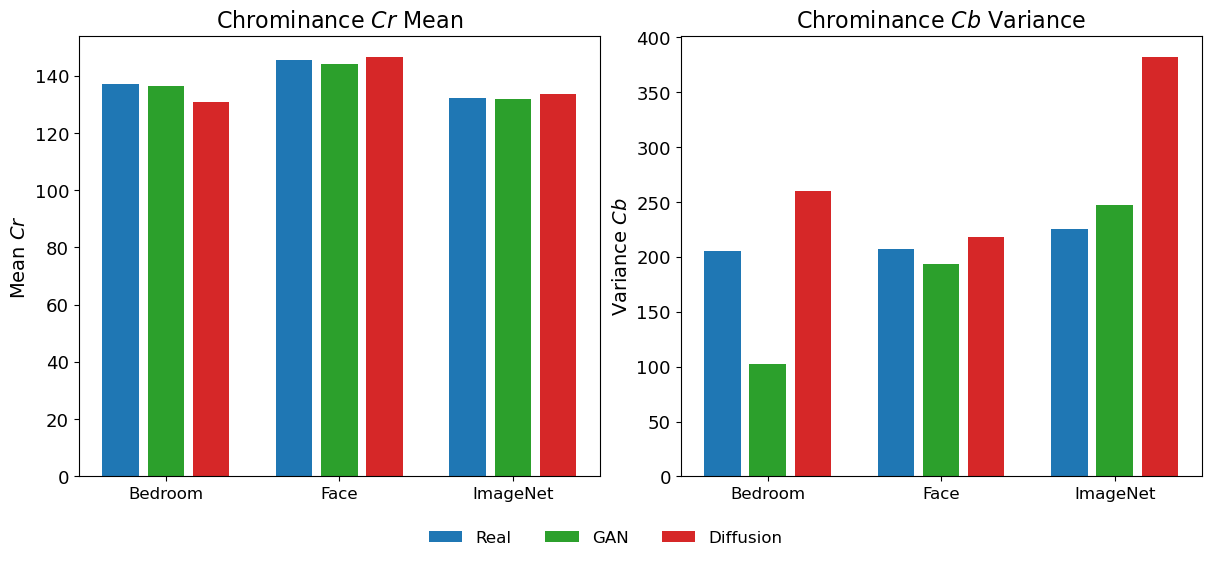

In [24]:
import numpy as np
import matplotlib.pyplot as plt

datasets      = ["Bedroom", "Face", "ImageNet"]
mean_cr       = [137.08, 145.62, 132.10]    # Real
mean_cr_gan   = [136.30, 144.19, 131.94]    # GAN
mean_cr_diff  = [131.00, 146.62, 133.71]    # Diffusion

var_cb        = [205.56, 207.27, 225.82]    # Real
var_cb_gan    = [102.21, 193.48, 247.62]    # GAN
var_cb_diff   = [259.90, 218.48, 382.38]    # Diffusion

colors = ['tab:blue', 'tab:green', 'tab:red']
labels = ["Real","GAN","Diffusion"]

x = np.arange(len(datasets))
w = 0.21          # slightly less than before for spacing
gap = 0.05        # small gap between bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)

# (a) Cr Mean
ax1.bar(x-w-gap, mean_cr,      w, color=colors[0])
ax1.bar(x,       mean_cr_gan,  w, color=colors[1])
ax1.bar(x+w+gap, mean_cr_diff, w, color=colors[2])
ax1.set_xticks(x)
ax1.set_xticklabels(datasets, fontsize=12)
ax1.set_ylabel("Mean $Cr$", fontsize=14)
ax1.set_title("Chrominance $Cr$ Mean", fontsize=16)

# (b) Cb Variance
ax2.bar(x-w-gap, var_cb,      w, color=colors[0])
ax2.bar(x,       var_cb_gan,  w, color=colors[1])
ax2.bar(x+w+gap, var_cb_diff, w, color=colors[2])
ax2.set_xticks(x)
ax2.set_xticklabels(datasets, fontsize=12)
ax2.set_ylabel("Variance $Cb$", fontsize=14)
ax2.set_title("Chrominance $Cb$ Variance", fontsize=16)

fig.legend(labels, loc='upper center', ncol=3, frameon=False, 
           fontsize=12, bbox_to_anchor=(0.5,-0.02))

plt.savefig("figure_ycbcr_chroma.pdf", dpi=300, format='pdf')
plt.show()

→ Real: loaded 5000 images from ../data/BEST/bedroom/real


/var/folders/hf/2qw6xpcx1b51ntgj8ss0d90r0000gn/T/ipykernel_3992/1421020428.py:60: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  float(skew(v)),
/var/folders/hf/2qw6xpcx1b51ntgj8ss0d90r0000gn/T/ipykernel_3992/1421020428.py:61: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  float(kurtosis(v))


→ Real: loaded 6000 images from ../data/BEST/face/real
→ Real: loaded 10000 images from ../data/BEST/imagenet/real_imagenet
  total for Real: 21000

→ GAN: loaded 5000 images from ../data/BEST/bedroom/gansformer
→ GAN: loaded 6000 images from ../data/BEST/face/stylegan2
→ GAN: loaded 10000 images from ../data/BEST/imagenet/big_gan
  total for GAN: 21000

→ Diffusion: loaded 768 images from ../data/BEST/bedroom/ddpm
→ Diffusion: loaded 5999 images from ../data/BEST/face/palette
→ Diffusion: loaded 10000 images from ../data/BEST/imagenet/vq_diffusion
  total for Diffusion: 16767



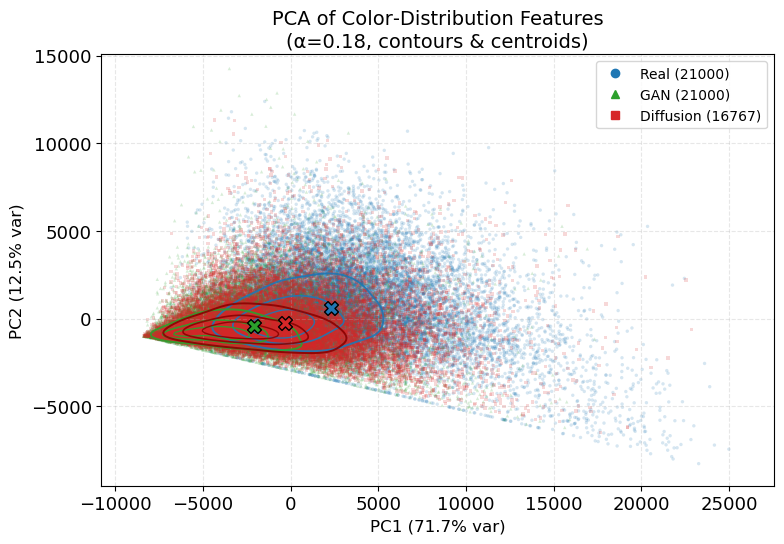

In [92]:
#!/usr/bin/env python3
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.decomposition import PCA
import matplotlib.lines as mlines

# ─── helper functions ─────────────────────────────────────────────────────────
def load_images(root_folder, recursive=False, exts=None):
    """
    Load all images under root_folder (recursing if desired).
    Returns a list of H×W×3 uint8 arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    img_list = []
    if recursive:
        for dp, _, fns in os.walk(root_folder):
            for fn in fns:
                if os.path.splitext(fn.lower())[1] in exts:
                    path = os.path.join(dp, fn)
                    try:
                        img = Image.open(path).convert('RGB')
                        img_list.append(np.array(img))
                    except:
                        pass
    else:
        for fn in os.listdir(root_folder):
            if os.path.splitext(fn.lower())[1] in exts:
                path = os.path.join(root_folder, fn)
                try:
                    img = Image.open(path).convert('RGB')
                    img_list.append(np.array(img))
                except:
                    pass
    return img_list

def extract_color_features(img):
    """
    Build a 36‐dim vector: for each of RGB, HSV, YCrCb, compute
    mean, variance, skewness, kurtosis for each channel.
    """
    feats = []
    # define the three color‐space conversions
    conversions = [
        (img,               'RGB'),
        (cv2.cvtColor(img, cv2.COLOR_RGB2HSV),    'HSV'),
        (cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb),  'YCbCr')
    ]
    for sp_img, name in conversions:
        for c in range(sp_img.shape[-1]):
            v = sp_img[...,c].ravel().astype(np.float32)
            feats.extend([
                float(np.mean(v)),
                float(np.var(v)),
                float(skew(v)),
                float(kurtosis(v))
            ])
    return np.array(feats, dtype=np.float32)

# ─── dataset definitions ──────────────────────────────────────────────────────
categories = {
    'Real': [
       ('../data/BEST/bedroom/real',      False),
       ('../data/BEST/face/real',         True),
       ('../data/BEST/imagenet/real_imagenet', True)
    ],
    'GAN': [
       ('../data/BEST/bedroom/gansformer', False),
       ('../data/BEST/face/stylegan2',     True),
       ('../data/BEST/imagenet/big_gan',   True)
    ],
    'Diffusion': [
       ('../data/BEST/bedroom/ddpm',         False),
       ('../data/BEST/face/palette',         True),
       ('../data/BEST/imagenet/vq_diffusion', True)
    ]
}

# ─── load images & extract features ───────────────────────────────────────────
X_list, y_list = [], []
for label, folders in categories.items():
    total = 0
    for folder, rec in folders:
        imgs = load_images(folder, recursive=rec)
        print(f"→ {label}: loaded {len(imgs)} images from {folder}")
        total += len(imgs)
        for img in imgs:
            X_list.append(extract_color_features(img))
            y_list.append(label)
    print(f"  total for {label}: {total}\n")

X = np.vstack(X_list)       # shape (n_samples, 36)
y = np.array(y_list)

# ─── replace any NaNs or infs produced by skew/kurtosis ───────────────────────
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

# ─── PCA down to 2 dims ───────────────────────────────────────────────────────
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X)
var1, var2 = pca.explained_variance_ratio_

# ─── plotting ────────────────────────────────────────────────────────────────
plt.figure(figsize=(8,8))
markers = {'Real':'o', 'GAN':'^', 'Diffusion':'s'}
point_cols  = {'Real':'tab:blue','GAN':'tab:green','Diffusion':'tab:red'}
contour_cols = {'Real':'tab:blue','GAN':'tab:green','Diffusion':'darkred'}

for lbl in categories:
    mask = (y == lbl)

    # 1) scatter points
    sns.scatterplot(
        x=Xp[mask,0], y=Xp[mask,1],
        s=6, alpha=0.18,
        color=point_cols[lbl], marker=markers[lbl],
        edgecolor='none',
        zorder=1
    )

    # 2) density contours (darker for Diffusion)
    sns.kdeplot(
        x=Xp[mask,0], y=Xp[mask,1],
        levels=[.5, .75, .9],
        colors=[contour_cols[lbl]]*3,
        linewidths=[1.4,1.2,1.0],
        alpha=0.9,
        fill=False,
        zorder=2
    )

    # 3) class centroid on top
    cx, cy = Xp[mask,0].mean(), Xp[mask,1].mean()
    plt.scatter(
        cx, cy, marker='X', s=100,
        color=point_cols[lbl], edgecolor='k',
        linewidth=1.0, zorder=10
    )

# 4) custom legend so no transparency in handles
legend_handles = []
for lbl in ['Real','GAN','Diffusion']:
    handle = mlines.Line2D(
        [], [], color=point_cols[lbl], marker=markers[lbl],
        linestyle='None', markersize=6, label=f"{lbl} ({np.sum(y==lbl)})"
    )
    legend_handles.append(handle)
plt.legend(
    handles=legend_handles,
    loc='upper right',
    fontsize='small',
    frameon=True
)

plt.xlabel(f"PC1 ({var1*100:.1f}% var)")
plt.ylabel(f"PC2 ({var2*100:.1f}% var)")
plt.title("PCA of Color‐Distribution Features\n(α=0.18, contours & centroids)")
plt.gca().set_aspect('equal', 'box')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('pca_color_features.pdf', dpi=300, bbox_inches='tight')
plt.show()

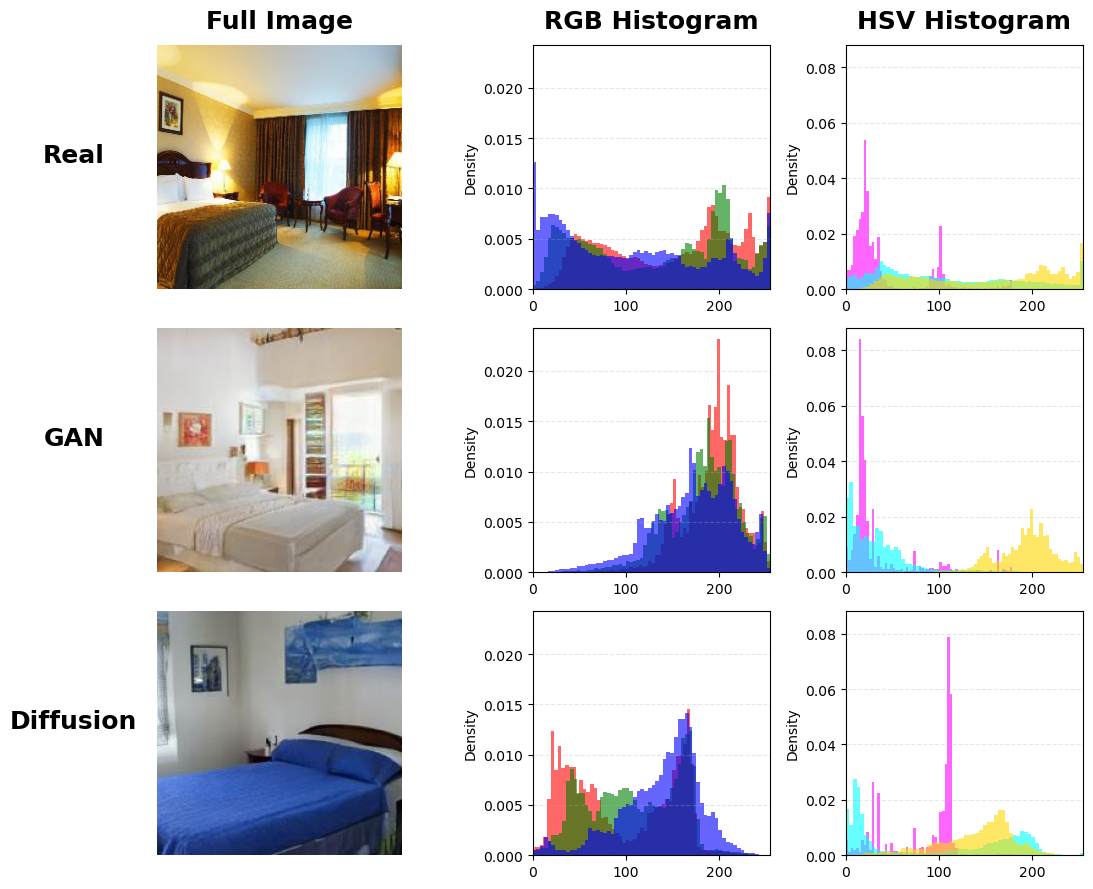

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def sorted_image_list(folder):
    return sorted([fn for fn in os.listdir(folder)
                   if fn.lower().endswith(('.png','.jpg','.jpeg','.bmp','tiff'))])

def pick_by_rank(base_dir, subfolder, rank):
    files = sorted_image_list(os.path.join(base_dir, subfolder))
    if not (0 <= rank < len(files)):
        raise IndexError(f"Rank {rank} out of range for {subfolder}")
    return os.path.join(base_dir, subfolder, files[rank])

def plot_rgb_hsv_hist(img_path, ax_img, ax_rgb, ax_hsv):
    img = np.array(Image.open(img_path).convert('RGB'))

    # Show image with its own aspect ratio
    ax_img.imshow(img)
    h, w = img.shape[:2]
    ax_img.set_aspect(w/h)
    ax_img.set_adjustable('box')
    # Hide ticks and spines, but NOT axis label
    ax_img.set_xticks([])
    ax_img.set_yticks([])
    for spine in ax_img.spines.values():
        spine.set_visible(False)

    # RGB density
    for i, col in enumerate(['r','g','b']):
        ax_rgb.hist(img[...,i].ravel(),
                    bins=64, density=True,
                    color=col, alpha=0.6)
    ax_rgb.set_xlim(0,255)
    ax_rgb.set_ylabel('Density')
    ax_rgb.grid(axis='y', linestyle='--', alpha=0.3)

    # HSV density
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    for chan, col in zip([0,1,2], ['magenta','cyan','gold']):
        ax_hsv.hist(hsv[...,chan].ravel(),
                    bins=64, density=True,
                    color=col, alpha=0.6)
    ax_hsv.set_xlim(0,255)
    ax_hsv.set_ylabel('Density')
    ax_hsv.grid(axis='y', linestyle='--', alpha=0.3)


if __name__ == '__main__':
    root     = '../data/BEST/bedroom'
    idx_real = 10
    idx_gan  = 33
    idx_diff = 32

    paths = {
        'Real'     : pick_by_rank(root, 'real',      idx_real),
        'GAN'      : pick_by_rank(root, 'gansformer', idx_gan),
        'Diffusion': pick_by_rank(root, 'ddpm',       idx_diff),
    }

    # make 3×3 grid: image column a bit wider but keep box aspect
    fig, axes = plt.subplots(
        3, 3, figsize=(11, 9),
        gridspec_kw={'width_ratios': [1.5, 1, 1]}
    )

    for row, label in enumerate(['Real','GAN','Diffusion']):
        plot_rgb_hsv_hist(
            paths[label],
            ax_img = axes[row,0],
            ax_rgb = axes[row,1],
            ax_hsv = axes[row,2]
        )
        # Put the label on the left, vertically centered
        axes[row,0].set_ylabel(label, fontsize=18, fontweight='bold', rotation=0, labelpad=60, va='center')
        axes[row,0].yaxis.set_label_position("left")
        axes[row,0].yaxis.tick_left()
        axes[row,0].set_yticks([])  # No y-ticks for the images

        # Only the top row gets the column titles
        if row == 0:
            axes[row,0].set_title('Full Image', fontsize=18, weight='bold', pad=12)
            axes[row,1].set_title('RGB Histogram', fontsize=18, weight='bold', pad=12)
            axes[row,2].set_title('HSV Histogram', fontsize=18, weight='bold', pad=12)

    # unify histogram y‐limits
    max_rgb = max(ax.get_ylim()[1] for ax in axes[:,1])
    max_hsv = max(ax.get_ylim()[1] for ax in axes[:,2])
    for ax in axes[:,1]:
        ax.set_ylim(0, max_rgb)
    for ax in axes[:,2]:
        ax.set_ylim(0, max_hsv)

    plt.tight_layout()
    fig.savefig('fig_color_histograms_fixed.pdf', dpi=300)
    plt.show()